### 1.参数获取

In [ ]:
import json
import os

# 打开json文件 获取参数
with open('config.json', 'r') as f:
    config = json.load(f)
    print("config get success !")

# 读取参数
market_config = config['market_config']
grid_config = config['grid_config']

# 打印参数
print(market_config.keys())
print(grid_config.keys())

# 密钥替换 如果config写了密钥就注释下面的代码
# market_config["api_key"] = os.getenv("LIVECOINWATCH_API_KEY")

print(grid_config["investment"])

print(market_config["api_key"])

config get success !
dict_keys(['url', 'api_key', 'currency', 'code', 'start', 'end'])
dict_keys(['lower_bound', 'upper_bound', 'num_grids', 'leverage', 'investment', 'mode', '_comment', 'fee'])
5000
1a4d4479-13a4-4146-bed1-86549e6b48a8


### 2.数据获取

In [2]:
from src.market_data import MarketData

market_data = MarketData(market_config)
prices, timestamps = market_data.fetch_real_data()

print("Prices:", prices[:5])
print("Timestamps:", timestamps[:5])


Prices: [59139.545703792886, 59701.79742106999, 60795.508674910496, 60505.67392716708, 61216.127592476456]
Timestamps: [1724199000000, 1724251800000, 1724304600000, 1724357400000, 1724410200000]


In [3]:
stock_info = [timestamps, prices]
print(stock_info[0][:5])
print("========")
print(stock_info[1][:5])

[1724199000000, 1724251800000, 1724304600000, 1724357400000, 1724410200000]
[59139.545703792886, 59701.79742106999, 60795.508674910496, 60505.67392716708, 61216.127592476456]


### 3.网格策略

In [4]:
from src.GridStrategy import GridStrategy

strategy = GridStrategy(grid_config, stock_info)
print("网格价格:", strategy.grid_prices)
print("中位数价格:", strategy.grid_median_price)
print("网格持仓股票数量:", strategy.grid_stocks)
print("当前股票数量:", strategy.hold_stocks)
print("平均持仓成本:", strategy.average_hold_price)
print("爆仓线:", strategy.break_line)
strategy.run_strategy()
# strategy.plot_results()

# 起始条件 股票价格 激活条件（默认立即执行）

# 终止条件（默认超出区间）价格结束/时间结束

# 网格收益：每完成一次卖出累积的收益=（高网格价格-低网格价格）/低网格价格）*网格资产量-手续费


每网格购买的股票量: 0.0026666666666666666
网格价格: [50000.0, 51020.4081632653, 52040.816326530614, 53061.22448979592, 54081.63265306123, 55102.04081632653, 56122.448979591834, 57142.857142857145, 58163.26530612245, 59183.67346938775, 60204.08163265306, 61224.489795918365, 62244.897959183676, 63265.30612244898, 64285.71428571429, 65306.12244897959, 66326.5306122449, 67346.9387755102, 68367.3469387755, 69387.75510204081, 70408.16326530612, 71428.57142857142, 72448.97959183673, 73469.38775510204, 74489.79591836735, 75510.20408163266, 76530.61224489796, 77551.02040816327, 78571.42857142858, 79591.83673469388, 80612.24489795919, 81632.6530612245, 82653.0612244898, 83673.4693877551, 84693.87755102041, 85714.28571428571, 86734.69387755102, 87755.10204081633, 88775.51020408163, 89795.91836734694, 90816.32653061225, 91836.73469387754, 92857.14285714286, 93877.55102040817, 94897.95918367346, 95918.36734693879, 96938.77551020408, 97959.18367346938, 98979.5918367347, 100000.0]
中位数价格: 75000.0
网格持仓股票数量: [0.0026

### 4.可视化模型 

In [5]:
# self.detial = [["委托时间", "成交时间", "交易方向", "成交价格", "成交金额", "成交额(股票数)", "手续费", "现金余额", "持仓股票数量"]]

detial = strategy.detial
# 导出交易明细
open("detial.csv", "w").write("\n".join([",".join(map(str, i)) for i in detial]))
transposed_data = list(map(list, zip(*detial)))

/tmp/ipykernel_85841/617889308.py:97: UserWarning: Glyph 21334 (\N{CJK UNIFIED IDEOGRAPH-5356}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_85841/617889308.py:97: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_85841/617889308.py:97: UserWarning: Glyph 20080 (\N{CJK UNIFIED IDEOGRAPH-4E70}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_85841/617889308.py:97: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/AiChaosN/miniconda3/envs/llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21334 (\N{CJK UNIFIED IDEOGRAPH-5356}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/AiChaosN/miniconda3/envs/llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from

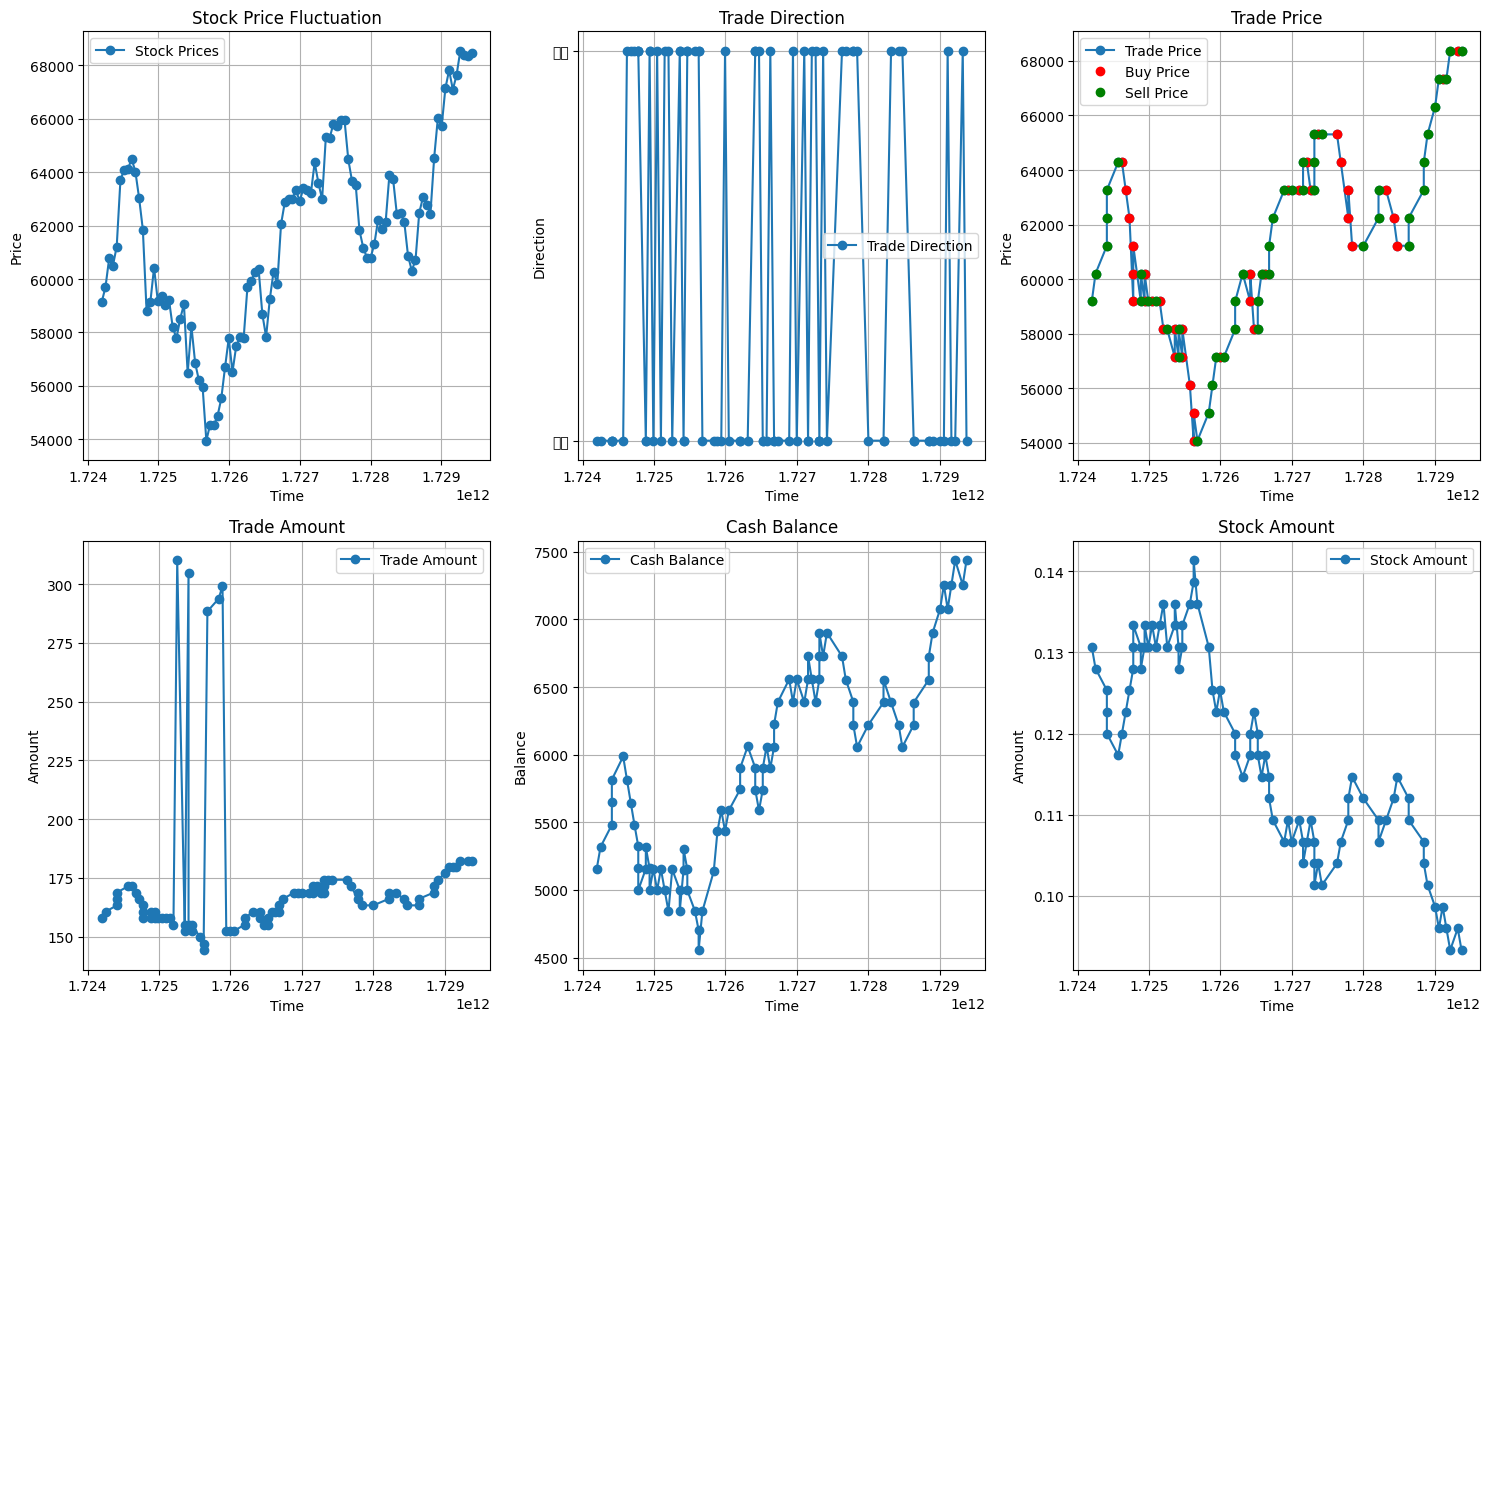

In [6]:
import matplotlib.pyplot as plt

# 示例数据
t1 = stock_info[0]
d1 = stock_info[1]


# 交易时间
t2 = transposed_data[0][1:]
# 交易方向
d2 = transposed_data[2][1:]
# 成交价格
d3 = transposed_data[3][1:]

# 成交金额
d4 = transposed_data[4][1:]

# 现金余额
cash_balance = transposed_data[7][1:]

# 持仓股票数量
stock_amount = transposed_data[8][1:]


# 创建 3x3 的图
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# 股票价格波动
axs[0, 0].plot(t1, d1, label="Stock Prices", marker="o")
axs[0, 0].set_title("Stock Price Fluctuation")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Price")
axs[0, 0].legend()
axs[0, 0].grid()

# 交易方向 (买入/卖出)
axs[0, 1].plot(t2, d2, label="Trade Direction", marker="o")
axs[0, 1].set_title("Trade Direction")
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("Direction")
axs[0, 1].legend()
axs[0, 1].grid()

# 成交价格 (红线买入/绿线卖出)
# 分别存储买入和卖出的价格及对应索引
buy_prices = [(i, price) for i, (direction, price) in enumerate(zip(d2, d3)) if direction == "买入"]
sell_prices = [(i, price) for i, (direction, price) in enumerate(zip(d2, d3)) if direction == "卖出"]
# 分解为索引和价格
buy_indices, buy_values = zip(*buy_prices) if buy_prices else ([], [])
sell_indices, sell_values = zip(*sell_prices) if sell_prices else ([], [])
# 绘制数据
axs[0, 2].plot(t2, d3, label="Trade Price", marker="o")
axs[0, 2].plot([t2[i] for i in buy_indices], buy_values, "ro", label="Buy Price")
axs[0, 2].plot([t2[i] for i in sell_indices], sell_values, "go", label="Sell Price")
axs[0, 2].set_title("Trade Price")
axs[0, 2].set_xlabel("Time")
axs[0, 2].set_ylabel("Price")
axs[0, 2].legend()
axs[0, 2].grid()

# 成交金额
axs[1, 0].plot(t2, d4, label="Trade Amount", marker="o")
axs[1, 0].set_title("Trade Amount")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Amount")
axs[1, 0].legend()
axs[1, 0].grid()

# 现金余额
axs[1, 1].plot(t2, cash_balance, label="Cash Balance", marker="o")

axs[1, 1].set_title("Cash Balance")
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_ylabel("Balance")
axs[1, 1].legend()
axs[1, 1].grid()

# 持仓股票数量
axs[1, 2].plot(t2, stock_amount, label="Stock Amount", marker="o")
axs[1, 2].set_title("Stock Amount")
axs[1, 2].set_xlabel("Time")
axs[1, 2].set_ylabel("Amount")
axs[1, 2].legend()
axs[1, 2].grid()



# 保留空图占位符
# axs[1, 0].axis('off')
# axs[1, 1].axis('off')
# axs[1, 2].axis('off')
axs[2, 0].axis('off')
axs[2, 1].axis('off')
axs[2, 2].axis('off')

# 调整布局
plt.tight_layout()
plt.show()


In [7]:
len(t1) == len(t2)

False